<a href="https://colab.research.google.com/github/braxtonb46/fraud-clustering/blob/main/Fraud_Clusters_%26_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle
!mkdir -p ~/.kaggle

# Create kaggle.json file (you'll need to replace these with your actual Kaggle credentials)
!echo '{CREDENTIALS}' > ~/.kaggle/kaggle.json

# Set proper permissions
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d mlg-ulb/creditcardfraud

!unzip creditcardfraud.zip

import pandas as pd
df = pd.read_csv('creditcard.csv')


Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 96% 63.0M/66.0M [00:01<00:00, 48.8MB/s]
100% 66.0M/66.0M [00:01<00:00, 52.5MB/s]
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns


In [4]:
#print(df.info)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
x = df.drop(columns = 'Class')
y = df['Class']


# Initial KMeans - 5 Clusters

In [6]:
k = 5
kmeans = KMeans(n_clusters = k , random_state = 42)

In [7]:
#y_1 = pd.DataFrame(kmeans.fit_predict(x))
y_1 = kmeans.fit_predict(x)

In [8]:
print(y_1 is kmeans.labels_)

True


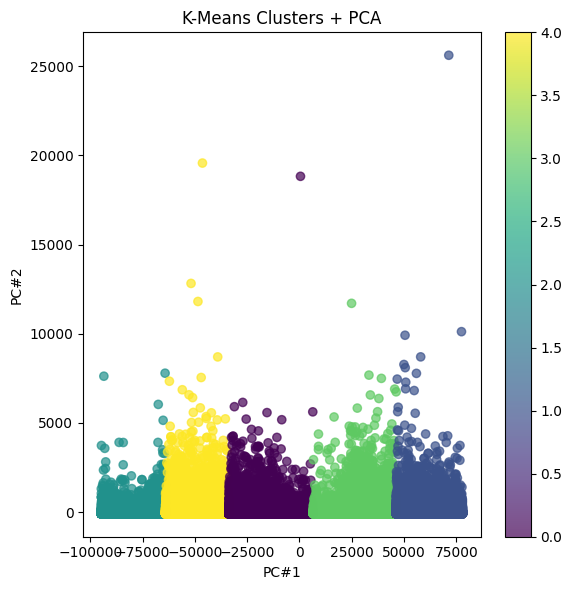

Variance explained: [9.99972249e-01 2.77382192e-05]


In [9]:
pca = PCA(n_components=2)
pca_results = pca.fit_transform(x)

# Create scatter plot
plt.figure(figsize=(6, 6))
scatter = plt.scatter(pca_results[:, 0], pca_results[:, 1],
                      c=kmeans.labels_,
                      cmap='viridis',
                      alpha=0.7)
plt.title('K-Means Clusters + PCA')
plt.xlabel('PC#1')
plt.ylabel('PC#2')
plt.colorbar(scatter)
plt.tight_layout()
plt.show()

# Print variance explained by first two components
print("Variance explained:", pca.explained_variance_ratio_)

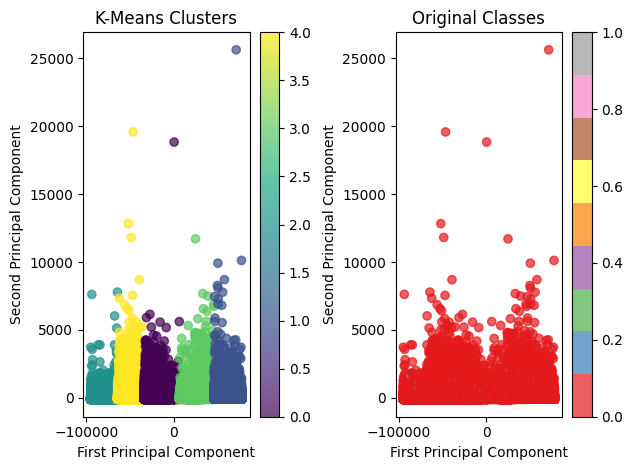

In [10]:
# First subplot - K-means Clusters
plt.subplot(1, 2, 1)
scatter_kmeans = plt.scatter(pca_results[:, 0], pca_results[:, 1],
                             c=kmeans.labels_,
                             cmap='viridis',
                             alpha=0.7)
plt.title('K-Means Clusters')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(scatter_kmeans)

# Second subplot - Original Classes
plt.subplot(1, 2, 2)
scatter_original = plt.scatter(pca_results[:, 0], pca_results[:, 1],
                               c=y,  # Original class labels
                               cmap='Set1',
                               alpha=0.7)
plt.title('Original Classes')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(scatter_original)

plt.tight_layout()
plt.show()


# Intermediate KMeans - 3 Clusters

In [11]:
k = 3
kmeans = KMeans(n_clusters = k , random_state = 42)
y_2 = kmeans.fit_predict(x)


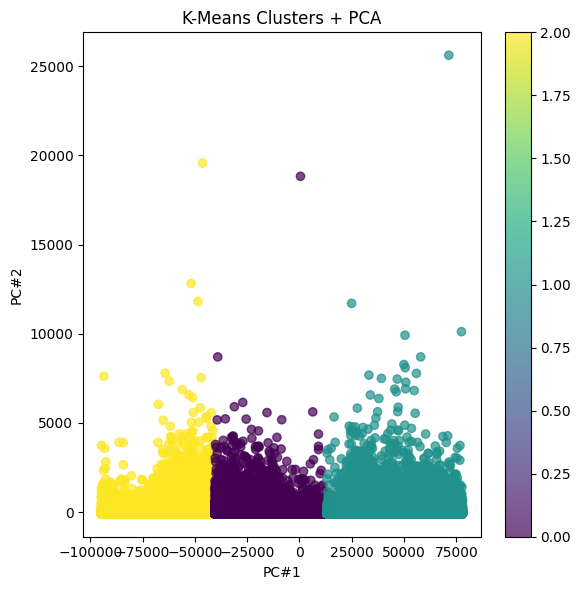

Variance explained: [9.99972249e-01 2.77382192e-05]


In [12]:
pca = PCA(n_components=2)
pca_results = pca.fit_transform(x)

# Create scatter plot
plt.figure(figsize=(6, 6))
scatter = plt.scatter(pca_results[:, 0], pca_results[:, 1],
                      c=kmeans.labels_,
                      cmap='viridis',
                      alpha=0.7)
plt.title('K-Means Clusters + PCA')
plt.xlabel('PC#1')
plt.ylabel('PC#2')
plt.colorbar(scatter)
plt.tight_layout()
plt.show()

# Print variance explained by first two components
print("Variance explained:", pca.explained_variance_ratio_)

# Tertiary KMeans - 2 Clusters

In [13]:
k = 2
kmeans = KMeans(n_clusters = k , random_state = 42)
y_3 = kmeans.fit_predict(x)

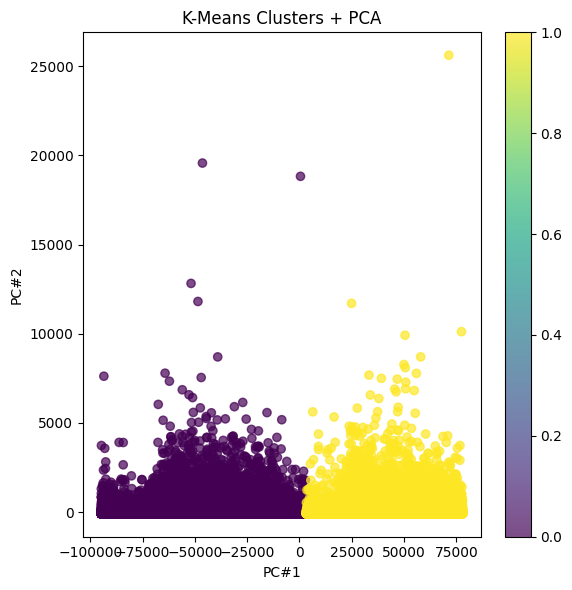

Variance explained: [9.99972249e-01 2.77382192e-05]


In [14]:
pca = PCA(n_components=2)
pca_results = pca.fit_transform(x)

# Create scatter plot
plt.figure(figsize=(6, 6))
scatter = plt.scatter(pca_results[:, 0], pca_results[:, 1],
                      c=kmeans.labels_,
                      cmap='viridis',
                      alpha=0.7)
plt.title('K-Means Clusters + PCA')
plt.xlabel('PC#1')
plt.ylabel('PC#2')
plt.colorbar(scatter)
plt.tight_layout()
plt.show()

# Print variance explained by first two components
print("Variance explained:", pca.explained_variance_ratio_)

# Refine Clusters

In [30]:
#initial dataset class counts vs. clustering counts
y_3 = pd.DataFrame(y_3)
print(df['Class'].value_counts())
print(y_3[0].value_counts())

print(df['Class'].unique())
print(df['Class'].nunique())
print(kmeans.inertia_)

Class
0    284315
1       492
Name: count, dtype: int64
0
0    153163
1    131644
Name: count, dtype: int64
[0 1]
2
118320091408058.72


### 10 Initializations

In [33]:
kmeans2 = KMeans(n_init = 10, n_clusters = 2, init = 'k-means++')
y4 = pd.DataFrame(kmeans2.fit_predict(x))
print(kmeans2.inertia_)
print(y4[0].value_counts())

118320090989904.78
0
0    153163
1    131644
Name: count, dtype: int64


### Testing w/ PCA Input Data

In [41]:
y5 = pd.DataFrame(kmeans2.fit_predict(pca_results))
print(kmeans2.inertia_)
print(y5[0].value_counts())

118320086996722.98
0
0    153164
1    131643
Name: count, dtype: int64


### Feature Selector

In [47]:

def select_top_features(X, y, num_features=10):

    selector = SelectKBest(score_func=f_classif, k=num_features)
    selector.fit(X, y)

    selected_feature_indices = selector.get_support(indices=True)

    if isinstance(X, pd.DataFrame):
        selected_features = X.columns[selected_feature_indices]
    else:
        selected_features = [f"Feature_{i}" for i in selected_feature_indices]

    #p-values & f-scores
    scores = selector.scores_
    p_values = selector.pvalues_
    #merge into dataframe with names & scores & values
    feature_scores = pd.DataFrame({
        'feature': X.columns if isinstance(X, pd.DataFrame) else [f"Feature_{i}" for i in range(X.shape[1])],
        'f_score': scores,
        'p_value': p_values
    })

    feature_scores_sorted = feature_scores.sort_values('f_score', ascending=False)

    return {
        'selected_features': selected_features,
        'feature_scores': feature_scores_sorted
    }

#results = select_top_features(X, y, num_features=10)

#print("Selected Features:")
#print(results['selected_features'])

# Print detailed feature scores
#print("\nFeature Scores:")
#print(results['feature_scores'].head(10))

In [43]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

selector = SelectKBest(score_func=f_classif, k=10)
x_selected = selector.fit_transform(x, y)
y6 = pd.DataFrame(kmeans2.fit_predict(x_selected))
print(kmeans2.inertia_)
print(y6[0].value_counts())

3079555.854129085
0
0    169713
1    115094
Name: count, dtype: int64


In [44]:
selector = SelectKBest(score_func=f_classif, k=5)
x_selected = selector.fit_transform(x, y)
y7 = pd.DataFrame(kmeans2.fit_predict(x_selected))
print(kmeans2.inertia_)
print(y7[0].value_counts())

1119791.7268681258
0
0    194931
1     89876
Name: count, dtype: int64


In [45]:
selector = SelectKBest(score_func=f_classif, k=3)
x_selected = selector.fit_transform(x, y)
y8 = pd.DataFrame(kmeans2.fit_predict(x_selected))
print(kmeans2.inertia_)
print(y8[0].value_counts())

582892.2749191619
0
1    247900
0     36907
Name: count, dtype: int64


In [46]:
selector = SelectKBest(score_func=f_classif, k=2)
x_selected = selector.fit_transform(x, y)
y9 = pd.DataFrame(kmeans2.fit_predict(x_selected))
print(kmeans2.inertia_)
print(y9[0].value_counts())

328495.7619573117
0
1    205498
0     79309
Name: count, dtype: int64


In [50]:
results = select_top_features(x, y, num_features= 3)
results

{'selected_features': Index(['V12', 'V14', 'V17'], dtype='object'),
 'feature_scores':    feature       f_score        p_value
 17     V17  33979.168593   0.000000e+00
 14     V14  28695.547788   0.000000e+00
 12     V12  20749.822361   0.000000e+00
 10     V10  14057.979985   0.000000e+00
 16     V16  11443.349428   0.000000e+00
 3       V3  11014.508305   0.000000e+00
 7       V7  10349.605408   0.000000e+00
 11     V11   6999.355047   0.000000e+00
 4       V4   5163.832114   0.000000e+00
 18     V18   3584.380605   0.000000e+00
 1       V1   2955.668946   0.000000e+00
 9       V9   2746.600273   0.000000e+00
 5       V5   2592.357929   0.000000e+00
 2       V2   2393.401678   0.000000e+00
 6       V6    543.510578  4.213111e-120
 21     V21    465.916251  3.002269e-103
 19     V19    344.990997   5.801517e-77
 20     V20    114.999731   7.964292e-27
 8       V8    112.548287   2.740673e-26
 27     V27     88.045296   6.441920e-21
 0     Time     43.252998   4.818269e-11
 28     V28 

#Shorten to Optimal

In [52]:
x2 = x[['V12','V14','V17']]
kmeans3 = KMeans(n_init = 10, n_clusters = 2, init = 'k-means++')
preds = pd.DataFrame(kmeans3.fit_predict(x2))
print(kmeans3.inertia_)
print(preds[0].value_counts())

585777.8906910056
0
0    208065
1     76742
Name: count, dtype: int64


### Top Transformation
- lowest inertia
- PCA + features selected from feature selector

In [53]:
x2p = pca.fit_transform(x2)
preds = pd.DataFrame(kmeans3.fit_predict(x2p))
print(kmeans3.inertia_)
print(preds[0].value_counts())

380947.8667910857
0
1    246062
0     38745
Name: count, dtype: int64


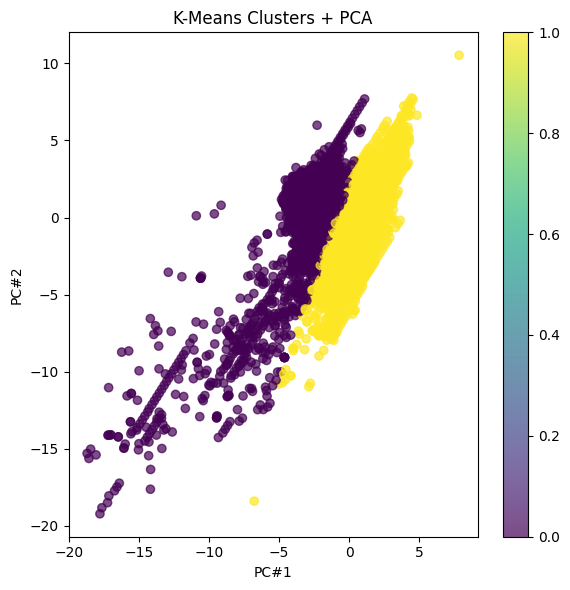

Variance explained: [0.37837195 0.34824409]


In [54]:
plt.figure(figsize=(6, 6))
scatter = plt.scatter(x2p[:, 0], x2p[:, 1],
                      c=kmeans3.labels_,
                      cmap='viridis',
                      alpha=0.7)
plt.title('K-Means Clusters + PCA')
plt.xlabel('PC#1')
plt.ylabel('PC#2')
plt.colorbar(scatter)
plt.tight_layout()
plt.show()

# Print variance explained by first two components
print("Variance explained:", pca.explained_variance_ratio_)